<a href="https://colab.research.google.com/github/sergiynesterenko90/feranec/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary libraries

In [891]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [892]:
tf.config.list_physical_devices('GPU')  # check that we actually have a GPU

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Get the handwriting dataset

In [893]:
m = 0.2
b = 0.3

N_train = 2
x_train = np.random.uniform(size=N_train)
y_train = m * x_train + b

noise_mu = 0
noise_sigma = 0.02
y_train += np.random.normal(noise_mu, noise_sigma, size=N_train)


N_test = 100
x_test = np.random.uniform(size=[N_test])
y_test = m * x_test + b

# Create the Neural Network

In [894]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1)
    ]
)

# Show how to make predictions (before training the net)

In [895]:
predictions = model(x_train[:1])
predictions

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.12762985]], dtype=float32)>

In [896]:
loss_fn = tf.keras.losses.MeanSquaredError()

In [897]:
loss_fn(y_train[:1], predictions)

<tf.Tensor: shape=(), dtype=float32, numpy=0.20298171>

In [898]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
# optimizer = tf.keras.optimizers.SGD(lr=1e-2)

model.compile(optimizer=optimizer, loss=loss_fn, metrics=["mse"], jit_compile=True)

In [899]:
history = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 609ms/step - loss: 0.5546 - mse: 0.5546
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.5342 - mse: 0.5342
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.5142 - mse: 0.5142
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.4947 - mse: 0.4947
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.4755 - mse: 0.4755
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.4568 - mse: 0.4568
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.4384 - mse: 0.4384
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.4206 - mse: 0.4206
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.4031 - mse: 0.4031
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.3861 - mse: 0.3861
Epoch 11/1000
1/1 [==============================] - 0s 6ms/step - 

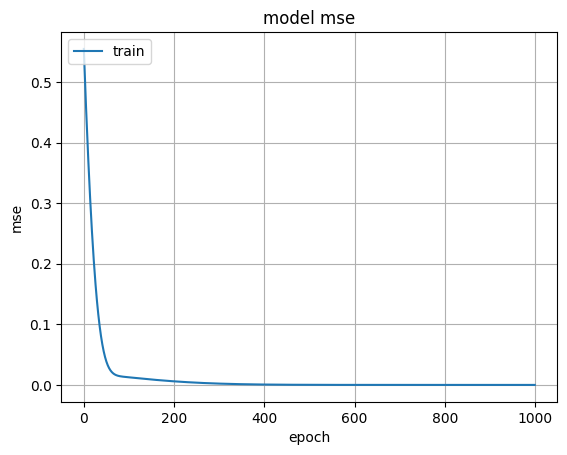

In [900]:
plt.plot(history.history['mse'])
# plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

In [901]:
eval = model.evaluate(x_test, y_test, verbose=2)
for name, ev in zip(model.metrics_names, eval):
    print(name, ev)

4/4 - 0s - loss: 8.2212e-04 - mse: 8.2212e-04 - 249ms/epoch - 62ms/step
loss 0.0008221228490583599
mse 0.0008221228490583599


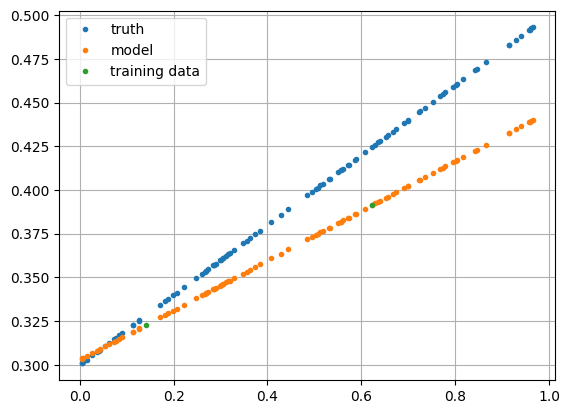

In [902]:
plt.plot(x_test, y_test, '.')
plt.plot(x_test, model(x_test), '.')
plt.plot(x_train, y_train, '.')
plt.legend(['truth', 'model', 'training data'], loc='upper left')
plt.grid()
plt.show()

In [903]:
model.summary()

for v in model.trainable_variables:
  print(v)


Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_55 (Flatten)        (None, 1)                 0         
                                                                 
 dense_117 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
<tf.Variable 'dense_117/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.1421247]], dtype=float32)>
<tf.Variable 'dense_117/bias:0' shape=(1,) dtype=float32, numpy=array([0.30281273], dtype=float32)>
